<a href="https://colab.research.google.com/github/BrunoDkno368/Transporte-2025/blob/main/transporte2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importamos librerias

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ETL

## EXTRAT (E)

In [79]:
df= pd.read_csv('/content/drive/MyDrive/ETL practica/Datos sube/datos_usos_2025.csv')

In [80]:
df.sample(5)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
113393,2025-03-23,TIRO FEDERAL RESISTENCIA SRL- LA CORDIAL SRL- ...,LINEA_206,NO,COLECTIVO,PROVINCIAL,CHACO,SN,450,NO
236203,2025-06-15,EMPRESA DE TRANSPORTES ALBARDON SRL,LINEA_440_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,415,NO
312179,2025-08-05,AUTOBUSES BUENOS AIRES SRL,LINEA_548_BSAS,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LOMAS DE ZAMORA,11394,NO
412425,2025-10-10,MICRO OMNIBUS TIGRE S.A.,BSAS_LINEA_508A,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ESCOBAR,1026,SI
205288,2025-05-26,EXPRESO COLONIA SA,LINEA_009_NQN,NO,COLECTIVO,MUNICIPAL,NEUQUÉN,SAN MARTIN DE LOS ANDES,362,NO


## TRANSFORM (T)

filas / columnas

In [81]:
print('la cantidad de filas que tiene es:', df.shape[0])

la cantidad de filas que tiene es: 432018


In [82]:
print('La cantidad de columnas que tiene es:', df.shape[1])

La cantidad de columnas que tiene es: 10


Informacion del df

In [83]:
print('la informacion del df es:''\n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432018 entries, 0 to 432017
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   432018 non-null  object
 1   NOMBRE_EMPRESA   432018 non-null  object
 2   LINEA            432018 non-null  object
 3   AMBA             432018 non-null  object
 4   TIPO_TRANSPORTE  432018 non-null  object
 5   JURISDICCION     429893 non-null  object
 6   PROVINCIA        429893 non-null  object
 7   MUNICIPIO        429893 non-null  object
 8   CANTIDAD         432018 non-null  int64 
 9   DATO_PRELIMINAR  432018 non-null  object
dtypes: int64(1), object(9)
memory usage: 33.0+ MB
la informacion del df es:
 None


Normalizacion del dato DIA_TRANSPORTE que esta como tipo object al tipo fecha

In [84]:
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'])
print(df['DIA_TRANSPORTE'].info())   # confirmamos que se cambio el tipo de dato por datetimes64

<class 'pandas.core.series.Series'>
RangeIndex: 432018 entries, 0 to 432017
Series name: DIA_TRANSPORTE
Non-Null Count   Dtype         
--------------   -----         
432018 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB
None


Estadisticas Basicas

In [85]:
print('las estadisticas del df son:''\n', df.describe())

las estadisticas del df son:
                       DIA_TRANSPORTE       CANTIDAD
count                         432018  432018.000000
mean   2025-05-31 11:28:55.077704960    7304.887384
min              2025-01-01 00:00:00      -1.000000
25%              2025-03-19 00:00:00     468.000000
50%              2025-06-02 00:00:00    1849.000000
75%              2025-08-13 00:00:00    6517.000000
max              2025-10-22 00:00:00  467163.000000
std                              NaN   16990.821733


Cantidad de nulos y faltantes

In [86]:
print(df.isna().sum())

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2125
PROVINCIA          2125
MUNICIPIO          2125
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64


verificamos en % cuantos son los datos faltantes

In [87]:
print(f' el servicio posee en % :''\n',(df.isna().sum()/len(df))*100)

 el servicio posee en % :
 DIA_TRANSPORTE     0.000000
NOMBRE_EMPRESA     0.000000
LINEA              0.000000
AMBA               0.000000
TIPO_TRANSPORTE    0.000000
JURISDICCION       0.491878
PROVINCIA          0.491878
MUNICIPIO          0.491878
CANTIDAD           0.000000
DATO_PRELIMINAR    0.000000
dtype: float64


Cambiamos los datos que no posee por "sin datos"

In [88]:
df = df.fillna('Sin datos')

In [89]:
print(df[['JURISDICCION','PROVINCIA','MUNICIPIO']].isna().sum()) #Confirmamos que ya no poseen nulos

JURISDICCION    0
PROVINCIA       0
MUNICIPIO       0
dtype: int64


Creamos nuevas columnas

In [90]:
#Creamos la columna MES
df['MES'] = df['DIA_TRANSPORTE'].dt.month
print('el df posee las siguientes columnas:',df.columns)

el df posee las siguientes columnas: Index(['DIA_TRANSPORTE', 'NOMBRE_EMPRESA', 'LINEA', 'AMBA', 'TIPO_TRANSPORTE',
       'JURISDICCION', 'PROVINCIA', 'MUNICIPIO', 'CANTIDAD', 'DATO_PRELIMINAR',
       'MES'],
      dtype='object')


In [91]:
df['MES'].unique()  #Como mes esta en numero lo vamos a pasar a nombre

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [92]:
#Creamos un diccionanrio para renombrar los datos de la columna MES
Mes = {1:'Enero', 2:'Febrero', 3:'Marzo',4:'Abril',5:'Mayo',6:'Junio',7:'Julio',8:'Agosto',9:'Septiembre',10:'Octubre'}

In [93]:
#Realizamos el cambio
df['MES']= df['MES'].map(Mes)

In [94]:
df['MES'].unique()   #Confirmamos que quedaron cambiados el nombre de los registros

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre'], dtype=object)

In [95]:
#Creamos la columna DIA
df['DIA'] = df['DIA_TRANSPORTE'].dt.day_name()
df['DIA'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [96]:
# Como los dias estan en Ingles, creamos un diccionario para pasar a Español los dias
dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

In [97]:
#Mapeamos dias de la semana y confirmamos que quedaron cambiados
df['DIA'] = df['DIA'].map(dias)
df['DIA'].unique()

array(['Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'Lunes',
       'Martes'], dtype=object)

In [98]:
df['PROVINCIA'].unique()

array(['BUENOS AIRES', 'JN', 'Sin datos', 'CHUBUT', 'ENTRE RÍOS',
       'LA PAMPA', 'TUCUMAN', 'MENDOZA', 'SANTA FE', 'RÍO NEGRO',
       'FORMOSA', 'SANTA CRUZ', 'TIERRA DEL FUEGO', 'JUJUY', 'NEUQUÉN',
       'CHACO', 'CORRIENTES', 'CATAMARCA', 'SAN LUIS', 'CORDOBA',
       'SANTIAGO DEL ESTERO', 'SAN JUAN', 'C.A.B.A',
       'CIUDAD AUTÓNOMA DE BUENOS AIRES'], dtype=object)

In [99]:
# PROVINCIA posee registros que dicen JN lo reemplazamos por Jurisdiccion Nacional
df['PROVINCIA'] = df['PROVINCIA'].replace('JN','JURISDICCION NACIONAL')
df['PROVINCIA'].unique()

array(['BUENOS AIRES', 'JURISDICCION NACIONAL', 'Sin datos', 'CHUBUT',
       'ENTRE RÍOS', 'LA PAMPA', 'TUCUMAN', 'MENDOZA', 'SANTA FE',
       'RÍO NEGRO', 'FORMOSA', 'SANTA CRUZ', 'TIERRA DEL FUEGO', 'JUJUY',
       'NEUQUÉN', 'CHACO', 'CORRIENTES', 'CATAMARCA', 'SAN LUIS',
       'CORDOBA', 'SANTIAGO DEL ESTERO', 'SAN JUAN', 'C.A.B.A',
       'CIUDAD AUTÓNOMA DE BUENOS AIRES'], dtype=object)

In [100]:
df.groupby('PROVINCIA')['CANTIDAD'].sum()

,CANTIDAD
PROVINCIA,
BUENOS AIRES,1184963455
C.A.B.A,179206642
CATAMARCA,10959953
CHACO,14017126
CHUBUT,20304097
CIUDAD AUTÓNOMA DE BUENOS AIRES,33885
CORDOBA,21714572
CORRIENTES,18277513
ENTRE RÍOS,20139783


In [101]:
df['PROVINCIA'] = df['PROVINCIA'].replace('CIUDAD AUTÓNOMA DE BUENOS AIRES', 'C.A.B.A' )

In [102]:
df['PROVINCIA'].unique()

array(['BUENOS AIRES', 'JURISDICCION NACIONAL', 'Sin datos', 'CHUBUT',
       'ENTRE RÍOS', 'LA PAMPA', 'TUCUMAN', 'MENDOZA', 'SANTA FE',
       'RÍO NEGRO', 'FORMOSA', 'SANTA CRUZ', 'TIERRA DEL FUEGO', 'JUJUY',
       'NEUQUÉN', 'CHACO', 'CORRIENTES', 'CATAMARCA', 'SAN LUIS',
       'CORDOBA', 'SANTIAGO DEL ESTERO', 'SAN JUAN', 'C.A.B.A'],
      dtype=object)

##LOAD (L)

In [103]:
df.to_csv('datos_usos_2025_ETL.csv', index=False)

#EDA

Grafico por tipo de transporte

In [104]:
df.columns

Index(['DIA_TRANSPORTE', 'NOMBRE_EMPRESA', 'LINEA', 'AMBA', 'TIPO_TRANSPORTE',
       'JURISDICCION', 'PROVINCIA', 'MUNICIPIO', 'CANTIDAD', 'DATO_PRELIMINAR',
       'MES', 'DIA'],
      dtype='object')

In [105]:
df.groupby('TIPO_TRANSPORTE')['CANTIDAD'].sum().sort_values(ascending=False)

,CANTIDAD
TIPO_TRANSPORTE,
COLECTIVO,2793733187
TREN,244010225
SUBTE,117695124
LANCHAS,403667
CIRCULAR,635


<Axes: ylabel='TIPO_TRANSPORTE'>

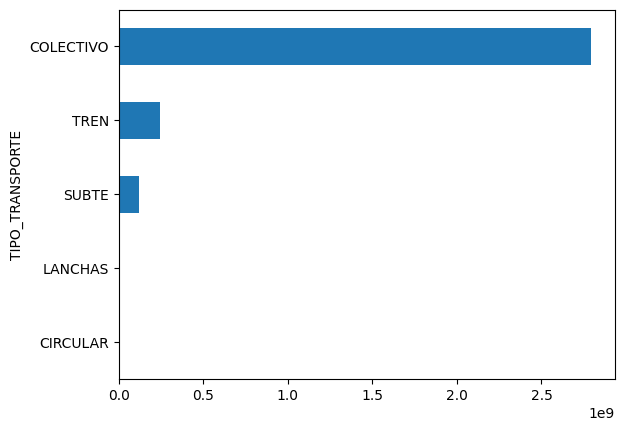

In [106]:
df.groupby('TIPO_TRANSPORTE')['CANTIDAD'].sum().sort_values().plot(kind='barh')

In [107]:
df.groupby('TIPO_TRANSPORTE')['CANTIDAD'].sum()

,CANTIDAD
TIPO_TRANSPORTE,
CIRCULAR,635
COLECTIVO,2793733187
LANCHAS,403667
SUBTE,117695124
TREN,244010225


Interior vs amba

In [108]:
df.groupby('AMBA')['CANTIDAD'].sum().sort_values(ascending=False)

,CANTIDAD
AMBA,
SI,2465168445
NO,690674393


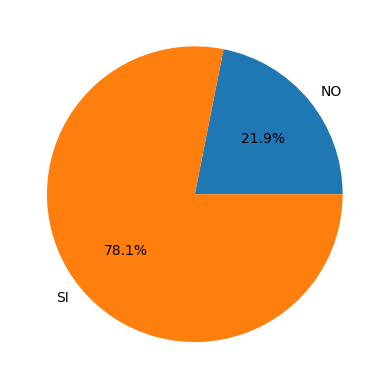

In [109]:
df.groupby('AMBA')['CANTIDAD'].sum().plot(kind='pie',  autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('')
plt.show()

Por Jurisdiccion

In [110]:
df.groupby('JURISDICCION')['CANTIDAD'].sum().sort_values(ascending=False)

,CANTIDAD
JURISDICCION,
NACIONAL,1088942545
PROVINCIAL,937707746
MUNICIPAL,832290781
C.A.B.A,179206642
Sin datos,117695124


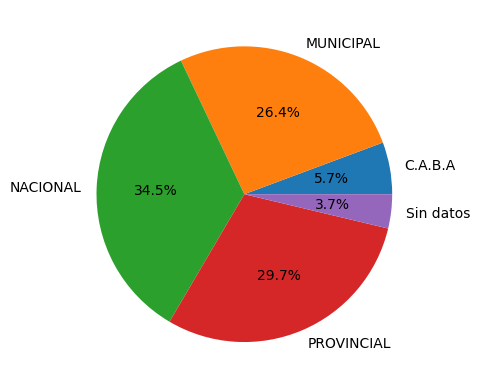

In [111]:
df.groupby('JURISDICCION')['CANTIDAD'].sum().plot(kind='pie',  autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('')
plt.show()

Por provincia

In [112]:
df['PROVINCIA'].unique()

array(['BUENOS AIRES', 'JURISDICCION NACIONAL', 'Sin datos', 'CHUBUT',
       'ENTRE RÍOS', 'LA PAMPA', 'TUCUMAN', 'MENDOZA', 'SANTA FE',
       'RÍO NEGRO', 'FORMOSA', 'SANTA CRUZ', 'TIERRA DEL FUEGO', 'JUJUY',
       'NEUQUÉN', 'CHACO', 'CORRIENTES', 'CATAMARCA', 'SAN LUIS',
       'CORDOBA', 'SANTIAGO DEL ESTERO', 'SAN JUAN', 'C.A.B.A'],
      dtype=object)

In [113]:
df.groupby('PROVINCIA')['CANTIDAD'].sum().sort_values(ascending=False)

,CANTIDAD
PROVINCIA,
BUENOS AIRES,1184963455
JURISDICCION NACIONAL,1088942545
C.A.B.A,179240527
MENDOZA,162579562
SANTA FE,120415049
Sin datos,117695124
SAN JUAN,68680837
JUJUY,46065401
NEUQUÉN,25531973


([], [])

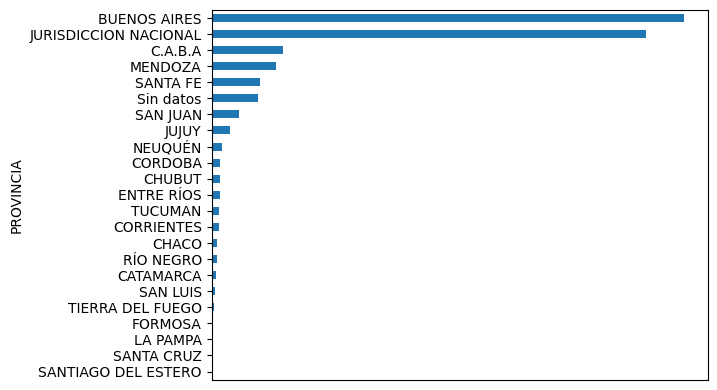

In [114]:
df.groupby('PROVINCIA')['CANTIDAD'].sum().sort_values().plot(kind='barh')
plt.xticks([])

Por meses

In [115]:
df.groupby('MES')['CANTIDAD'].sum().sort_values(ascending=False)

,CANTIDAD
MES,
Septiembre,355680998
Abril,347072568
Agosto,343919977
Mayo,340627745
Julio,332078104
Marzo,329032176
Junio,328219376
Enero,270681840
Febrero,270547148


([], [])

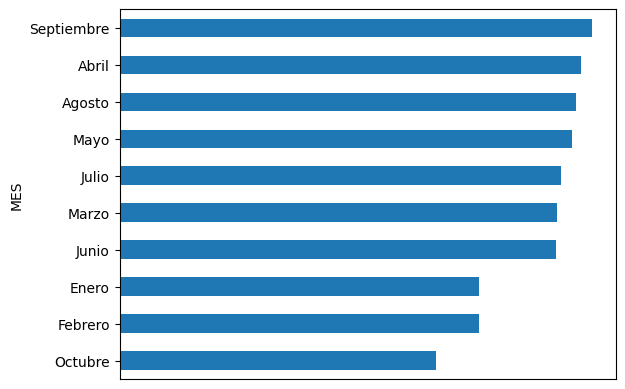

In [116]:
df.groupby('MES')['CANTIDAD'].sum().sort_values(ascending=True).plot(kind="barh")
plt.xticks([])

([], [])

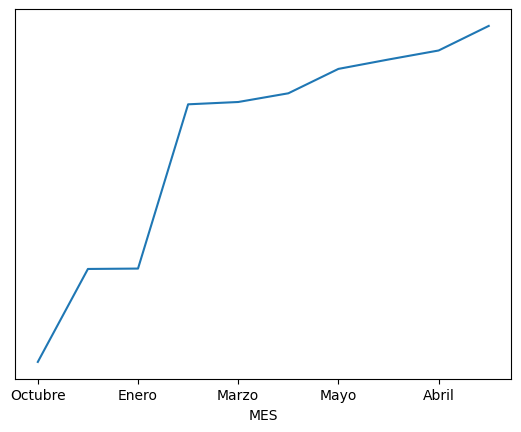

In [117]:
df.groupby('MES')['CANTIDAD'].sum().sort_values(ascending=True).plot(kind='line')
plt.yticks([])

In [118]:
df.groupby('DIA')['CANTIDAD'].sum().sort_values(ascending=False)

,CANTIDAD
DIA,
Miércoles,546833605
Jueves,540659237
Martes,539719469
Lunes,519437645
Viernes,519102481
Sábado,321662500
Domingo,168427901


([], [])

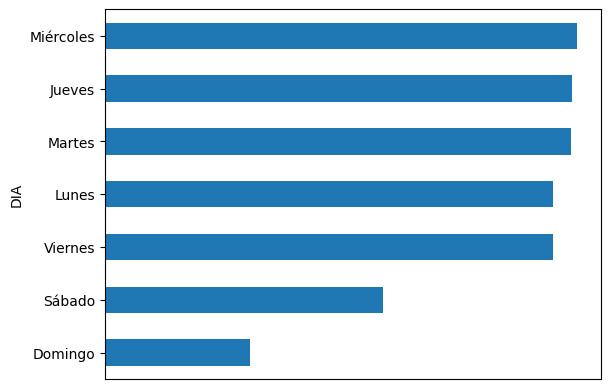

In [119]:
df.groupby('DIA')['CANTIDAD'].sum().sort_values().plot(kind="barh")
plt.xticks([])

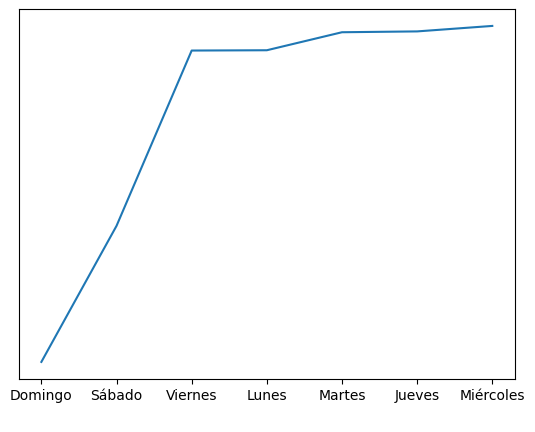

In [120]:
df.groupby('DIA')['CANTIDAD'].sum().sort_values().plot(kind='line')
plt.yticks([])
plt.xlabel(' ')
plt.show()



Top 10 empresas

In [121]:
df.groupby('NOMBRE_EMPRESA')['CANTIDAD'].sum().sort_values(ascending=False).head(10)


,CANTIDAD
NOMBRE_EMPRESA,
EMOVA MOVILIDAD S.A. (ex MTV),117695124
SOFSE - Roca,90348030
TRANSPORTES LA PERLITA S.A.,64692997
EMPRESA LINEA 216 S.A.T.,62876959
SOFSE- SARMIENTO,58357503
ROSARIO BUS S.A,48209958
LA CABAÑA S.A.,48032325
GENERAL TOMAS GUIDO S.A.C.I.F.,43948078
ERSA URBANO SA,42557842


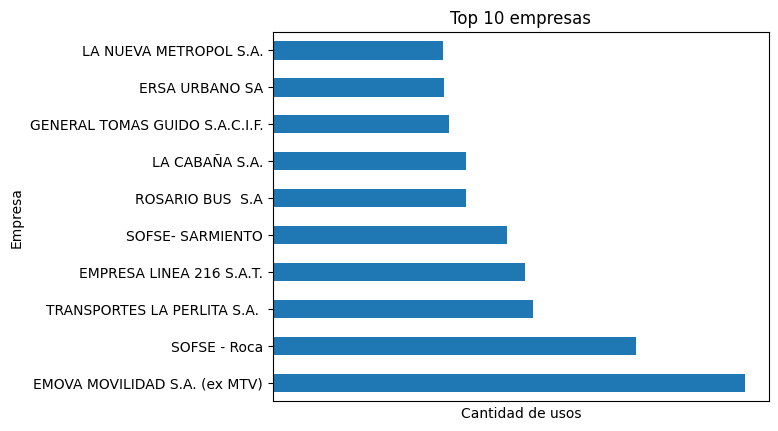

In [122]:
df.groupby('NOMBRE_EMPRESA')['CANTIDAD'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Cantidad de usos')
plt.ylabel('Empresa')
plt.title('Top 10 empresas')
plt.xticks([])
plt.show()